<img src="images/usm.png" width="480" height="240" align="left"/>

# MAT281 - 2° Semestre 2019
## Aplicaciones de la Matemática en la Ingeniería


EL siguiente laboratorio debe realizarse de manera individual. No es posible copiar y pegar código de otros estudiantes. 
Pueden consultar internet (stackoverflow, por ejemplo), pero deben indicar sus fuentes cuando corresponda.

**Nombre**: Francisca Román

**Rol**: 201504529-1


## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.


## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://images-na.ssl-images-amazon.com/images/I/717VaRblQCL._UX679_.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `serie_poleras.csv` y consta de las ventas de poleras durante los años del 2016 al 2019. 

El objetivo es predecir el precio de la polera basados en el número de ventas que se obtiene.


Primero es necesario definir la [elasticidad](https://en.wikipedia.org/wiki/Elasticity_(economics)) (en el sentido económico). La **elasticidad demanda-precio** o simplemente **elasticidad de la demanda**, mide la variación relativa o porcentual que experimenta la cantidad demandada como consecuencia de una variación en el precio de un uno por ciento, en otras palabras mide la intensidad con la que responden los compradores a una variación en el precio.


- Cuando la reducción del precio (P) hace que la cantidad demandada (Q) aumente tanto que la multiplicación de (P * Q) sea mayor a la original, se presenta una demanda elástica.E>1
- Cuando la reducción del precio (P) hace que la cantidad demandada (Q) aumente en proporciones iguales y (P * Q) sea igual, la elasticidad es proporcional o igual a 1.
- Cuando la reducción del precio (P) hace que la cantidad demandada (Q) aumente muy poco o nada que la multiplicación de (P * Q) es menor a la original, se afirma que la demanda de un bien es inelástica o rígida. E<1

Este concepto será clave para realizar una correcta predición en los resultados. Ahora, a modo de ayuda, analicemos los datos.

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import sklearn.model_selection

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [3]:
# cargar datos
df = pd.read_csv(os.path.join("data","serie_poleras.csv"), sep=",")

df = df[['FECHA_LUNES',
        'VENTA',
        'PRECIO',
         'STOCK',
         'NAVIDAD',
         'VERANO',
        'PRIMAVERA']]

df['FECHA_LUNES'] = pd.to_datetime(df['FECHA_LUNES'])
df.head()

,FECHA_LUNES,VENTA,PRECIO,STOCK,NAVIDAD,VERANO,PRIMAVERA
0,2016-11-28,4031,482.629433,218477.00,0,1,1
1,2016-12-05,8236,496.487690,209313.00,0,1,1
2,2016-12-12,11798,490.107492,225950.00,0,1,1
3,2016-12-19,15749,527.144433,155811.00,1,1,1
4,2016-12-26,5838,476.613886,139957.99,0,1,1


In [4]:
df["FECHA_LUNES"].max()

Timestamp('2019-08-26 00:00:00')

Le presentamos dos graficos de interés.

### a) Precio vs ventas

Dado que se quiere predecir el precio basado en las ventas de poleras, es necesario analizar la relación que existe entre ambos mediante un gráfico.

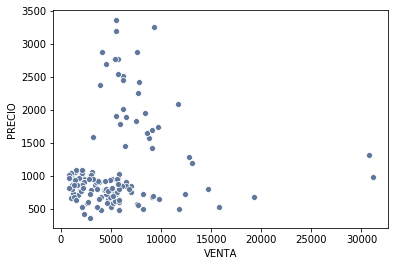

In [5]:
# parametros esteticos de seaborn
sns.scatterplot(x='VENTA',
           y='PRECIO',
           data=df)
plt.show()

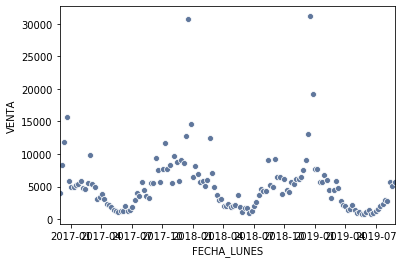

In [7]:
# parametros esteticos de seaborn

ax = sns.scatterplot(x='FECHA_LUNES',
           y='VENTA',
           data=df)

ax.set_xlim(df['FECHA_LUNES'].min(), df['FECHA_LUNES'].max())
plt.show()

Basado en la información presentada responda las siguientes preguntas:

1. ¿ Cómo debería ser la relación entre las poleras (elásticidad)?, ¿ Cómo es en realidad la elasticidad ?.

*Se debería observar una relación elástica, a medida que los precios disminuyen, la demanda debería aumentar. Sin embargo, pudiese ocurrir que en ciertas épocas del año (navidad, por ejemplo). la relación se vuelva inelástica, ya que en general, a pesar del precio, las personas tienden a comprar igual los regalos que desean sus seres queridos.

2.  ¿ Cuáles son las variables claves en el problema ?, ¿ Se necesitan más variables ?.

*Las variables claves en el problema serian la cantidad de ventas, precio y la fecha. Las variables como Invierno, Verano y temporada no son tan necesarias ya que estas se pueden inferir a partir de la variable Fecha.*

3. ¿ Es necesario separar por fechas ?, en caso afirmativo, separe el conjunto de datos según su criterio.

*Para hacer más fácil el análisis de datos se podrían separar por Estaciones del año. Esto facilita la visualización de los datos en los gráficos.*

4. Realice un análisis exploratorio de los datos sobre las variables escogida en el punto 2. Ocupe estos resultados para interpretar de mejor forma el problema.


5. Realice un ajuste de regresión lineal simple. Si es necesario, puede ocupar más de una regresión lineal simple según los casos encontrados. 
6. Realice predicciones de los precios para la venta de 10000,20000 y 30000 poleras.

In [8]:
# Pregunta 4

# resumen de la informacion

def resumen_por_columna(df,cols):
    pd_series = df[cols]
    
    # elementos distintos 
    l_unique = pd_series.unique()
    
    # elementos vacios
    
    l_vacios = pd_series[pd_series.isna()]
    
    df_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    
    return df_info

df_info=pd.concat([resumen_por_columna(df,'FECHA_LUNES'),resumen_por_columna(df,'VENTA'),resumen_por_columna(df,'PRECIO')])
df_info

,columna,unicos,vacios
0,FECHA_LUNES,144,0
0,VENTA,141,0
0,PRECIO,144,0


In [12]:
df[["VENTA","PRECIO","FECHA_LUNES"]].describe()

,VENTA,PRECIO
count,144.000000,144.000000
mean,5201.590278,1088.131268
std,4484.738756,643.147624
min,773.000000,360.901438
25%,2111.250000,717.992834
50%,4647.000000,866.619836
75%,6200.500000,1040.930251
max,31151.000000,3356.729486


In [19]:
# Pregunta 5

# Regresion lineal simple

X = df[['VENTA']]
Y = df['PRECIO']


# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) 

In [20]:
# ols sin intercepto
model_1 = linear_model.LinearRegression(fit_intercept = False)
model_train_1  = model_1.fit(X_train,Y_train)

print('\nmodelo sin intercepto')
print('coeficientes: ',model_train_1.coef_)
print('intercepto: ',model_train_1.intercept_)


modelo sin intercepto
coeficientes:  [0.1350911]
intercepto:  0.0


In [17]:
# ols con intercepto
model_2 = linear_model.LinearRegression()
model_train_2  = model_2.fit(X_train,Y_train)
print('modelo con intercepto')
print('coeficientes: ',model_train_2.coef_)
print('intercepto: ',model_train_2.intercept_)

modelo con intercepto
coeficientes:  [0.02523904]
intercepto:  962.928409041424


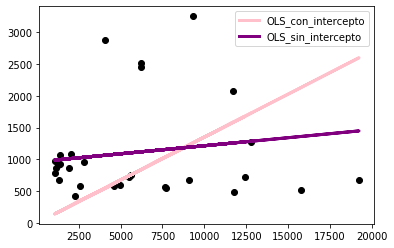

In [18]:
# Grafico con regresiones lineales incluidas

Y_predict_1 = model_train_1.predict(X_test)
Y_predict_2 = model_train_2.predict(X_test)

plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_predict_1, color='pink', linewidth=3, label='OLS_con_intercepto')
plt.plot(X_test, Y_predict_2, color='purple', linewidth=3, label='OLS_sin_intercepto')
plt.legend(loc='upper right')

### Referencias

* [A beginner’s guide to Linear Regression in Python with Scikit-Learn](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)


In [23]:
#Pregunta 6

Lista=[10000, 20000, 30000]
Y=model_train_2.predict(pd.DataFrame(Lista))
print('\nEl precio de venta de 10.000 poleras es',Y[0])
print('\nEl precio de venta de 20.000 poleras es',Y[1])
print('\nEl precio de venta de 30.000 poleras es',Y[2])


El precio de venta de 10.000 poleras es 1215.3187927442864

El precio de venta de 20.000 poleras es 1467.7091764471488

El precio de venta de 30.000 poleras es 1720.0995601500113
